# Analysis of New York Motor Vehicle Collisions
Team Members -  Sandip Palit, Amr Rashid and Matt Post

# Dataset Summary



NY Incidents Reference : https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95? 

Download Link: https://drive.google.com/file/d/0Bx5zOfpvQpLgNVhzQllTWFJxLXc/view?usp=sharing



NY Weather Link : https://www.wunderground.com

Download Link: https://drive.google.com/file/d/0Bx5zOfpvQpLgLWV6SE5Zb2RENHM/view?usp=sharing

Period: 2012 to 2016

No. of Rows: 769054 

# Data Importing, Auditing & Binning

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import matplotlib.style

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
#matplotlib.style.use('default')

#matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.read_csv("NYPD.csv",parse_dates=['DATE'])

In [4]:
# Addind Day of the Week column

df['DAY OF WEEK'] = df.DATE.map(lambda x: x.strftime("%A"))

In [5]:
# Adding Month column

def month(x):
    return ['', 'January','February', 'March', 'April', 'May', 'June', 
       'July', 'August', 'September', 'October', 'November', 'December'][x.month]

df['MONTH'] = df['DATE'].map(month)

In [6]:
# Binning Time of the Day

def convert_to_integerinteger(time):
    return int(time.replace(":", ""))

ranges = [0,600,1200,1800,2400]
labels = ['Early Morning','Morning','Early Afternoon','Evening']
df['TIMEBRACKET'] = pd.cut(df.TIME.map(convert_to_integerinteger), ranges, labels=labels).astype('category')

In [7]:
# Added column only for the sake of summing up no. of incidents when grouping

list = []
for n in range(len(df)):
    list.append(1)
df["INCIDENTS"] = list

In [8]:
df2=df.rename(columns={df.columns[3] : "ZIP_Code",df.columns[7]:"ON_STREET_NAME",df.columns[8]:
                      "CROSS_STREET_NAME",df.columns[9]:"OFF_STREET_NAME",df.columns[10]:"NO_OF_PERSONS_INJURED",
                      df.columns[11]:"NO_OF_PERSONS_KILLED",df.columns[12]:"NO_OF_PEDESTRIANS_INJURED",
                      df.columns[13]:"No_OF_PEDESTRIANS_KILLED",df.columns[14]:"NO_OF_CYCLIST_INJURED",
                      df.columns[15]:"NO_OF_CYCLIST_KILLED",df.columns[16]:"NO_OF_MOTORIST_INJURED",
                      df.columns[17]:"NO_OF_MOTORIST_KILLED",df.columns[18]:"CONTRIBUTING_FACTOR_1",
                      df.columns[19]:"CONTRIBUTING_FACTOR_2",df.columns[20]:"CONTRIBUTING_FACTOR_3",
                      df.columns[21]:"CONTRIBUTING_FACTOR_4",df.columns[22]:"CONTRIBUTING_FACTOR_5",
                      df.columns[23]:"UNIQUE_KEY",df.columns[24]:"VEHICLE_TYPE_CODE1",df.columns[25]:
                      "VEHICLE_TYPE_CODE2",df.columns[26]:"VEHICLE_TYPE_CODE3",df.columns[27]:"VEHICLE_TYPE_CODE4",
                      df.columns[28]:"VEHICLE_TYPE_CODE5",df.columns[29]:"DAY_OF_WEEK",df.columns[30]:"MONTH",
                       df.columns[31]:"TIMEBRACKET",df.columns[32]:"INCIDENTS"})
                     

In [9]:
df2.head()

,DATE,TIME,BOROUGH,ZIP_Code,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,UNIQUE_KEY,VEHICLE_TYPE_CODE1,VEHICLE_TYPE_CODE2,VEHICLE_TYPE_CODE3,VEHICLE_TYPE_CODE4,VEHICLE_TYPE_CODE5,DAY_OF_WEEK,MONTH,TIMEBRACKET,INCIDENTS
0,2016-03-14,0:45,MANHATTAN,10035.0,40.808279,-73.938793,"(40.8082795, -73.9387929)",EAST 129 STREET,MADISON AVENUE,NaN,...,3405059,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,Monday,March,Early Morning,1
1,2016-03-14,3:27,QUEENS,11372.0,40.747734,-73.882999,"(40.7477341, -73.8829986)",ROOSEVELT AVENUE,83 STREET,NaN,...,3405169,OTHER,NaN,NaN,NaN,NaN,Monday,March,Early Morning,1
2,2016-03-14,2:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3405070,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN,Monday,March,Early Morning,1
3,2016-03-14,2:00,NaN,NaN,NaN,NaN,NaN,PULASKI BRIDGE,EAGLE STREET,NaN,...,3405134,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN,Monday,March,Early Morning,1
4,2016-03-13,16:00,MANHATTAN,10012.0,40.723365,-73.995703,"(40.7233651, -73.9957032)",MULBERRY STREET,PRINCE STREET,NaN,...,3405049,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN,Sunday,March,Early Afternoon,1


In [10]:
df2.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP_Code', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
       'NO_OF_PERSONS_INJURED', 'NO_OF_PERSONS_KILLED',
       'NO_OF_PEDESTRIANS_INJURED', 'No_OF_PEDESTRIANS_KILLED',
       'NO_OF_CYCLIST_INJURED', 'NO_OF_CYCLIST_KILLED',
       'NO_OF_MOTORIST_INJURED', 'NO_OF_MOTORIST_KILLED',
       'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'CONTRIBUTING_FACTOR_3', 'CONTRIBUTING_FACTOR_4',
       'CONTRIBUTING_FACTOR_5', 'UNIQUE_KEY', 'VEHICLE_TYPE_CODE1',
       'VEHICLE_TYPE_CODE2', 'VEHICLE_TYPE_CODE3', 'VEHICLE_TYPE_CODE4',
       'VEHICLE_TYPE_CODE5', 'DAY_OF_WEEK', 'MONTH', 'TIMEBRACKET',
       'INCIDENTS'],
      dtype='object')

In [11]:
# Auditing the Dataset for content completeness

df2.count()

DATE                         769054
TIME                         769054
BOROUGH                      584753
ZIP_Code                     584686
LATITUDE                     647867
LONGITUDE                    647867
LOCATION                     647867
ON_STREET_NAME               655435
CROSS_STREET_NAME            655435
OFF_STREET_NAME               23792
NO_OF_PERSONS_INJURED        769054
NO_OF_PERSONS_KILLED         769054
NO_OF_PEDESTRIANS_INJURED    769054
No_OF_PEDESTRIANS_KILLED     769054
NO_OF_CYCLIST_INJURED        769054
NO_OF_CYCLIST_KILLED         769054
NO_OF_MOTORIST_INJURED       769054
NO_OF_MOTORIST_KILLED        769054
CONTRIBUTING_FACTOR_1        767363
CONTRIBUTING_FACTOR_2        676675
CONTRIBUTING_FACTOR_3         49848
CONTRIBUTING_FACTOR_4         10256
CONTRIBUTING_FACTOR_5          2569
UNIQUE_KEY                   769054
VEHICLE_TYPE_CODE1           768105
VEHICLE_TYPE_CODE2           688860
VEHICLE_TYPE_CODE3            49989
VEHICLE_TYPE_CODE4          

# Adding Weather Data

In [12]:
# Importing Weather Data
weather_raw = pd.read_excel("weather.xlsx")
weather_raw.set_index('Date', inplace=True)
weather = weather_raw[['WindAvg', 'VisAvg', 'Events', 'Precipi0.00a0.00ion']]
weather.head()

,WindAvg,VisAvg,Events,Precipi0.00a0.00ion
Date,,,,
2012-01-01,10.0,16.0,Rain,1.27
2012-01-02,17.0,16.0,NaN,0.00
2012-01-03,17.0,16.0,NaN,0.00
2012-01-04,12.0,16.0,NaN,0.00
2012-01-05,10.0,16.0,NaN,0.00


In [13]:
# Adding booleans columns for Rain, Snow & Fog

d_temp = df2.groupby('DATE')['INCIDENTS', 'NO_OF_PERSONS_INJURED'].sum()

df_daily = d_temp.join(weather).sort_values('INCIDENTS', ascending=False)
df_daily.Events = df_daily.Events.map(str).map(lambda x: x.split(" , "))

for event in ['Rain','Fog','Snow']:
    df_daily[event] = df_daily.Events.map(lambda x: event in x)

In [14]:
# Joining Data for a Global Dataset

df_temp2= df2.copy()
df_temp2.index = df_temp2["DATE"]

df_global = df_temp2.join(df_daily, lsuffix= 'INCIDENTS' )
df_global.drop('DATE',1,inplace=True)



# Final DataSets

In [15]:

df_daily.head(5)

,INCIDENTS,NO_OF_PERSONS_INJURED,WindAvg,VisAvg,Events,Precipi0.00a0.00ion,Rain,Fog,Snow
DATE,,,,,,,,,
2014-01-21,1161,168,NaN,NaN,[nan],0.00,False,False,False
2015-01-18,960,228,6.0,6.0,"[Fog, Rain]",53.34,True,True,False
2014-02-03,960,159,11.0,3.0,"[Fog, Rain, Snow]",29.72,True,True,True
2015-03-06,936,142,10.0,15.0,[nan],0.00,False,False,False
2013-11-26,867,243,7.0,11.0,[Rain],12.95,True,False,False


In [16]:
df_global.head()

,TIME,BOROUGH,ZIP_Code,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,NO_OF_PERSONS_INJUREDINCIDENTS,...,INCIDENTSINCIDENTS,INCIDENTS,NO_OF_PERSONS_INJURED,WindAvg,VisAvg,Events,Precipi0.00a0.00ion,Rain,Fog,Snow
DATE,,,,,,,,,,,,,,,,,,,,,
2012-07-01,18:00,MANHATTAN,10007.0,40.713692,-74.013754,"(40.7136919, -74.0137542)",WEST STREET,VESEY STREET,NaN,0,...,1,538,166,7.0,16.0,[nan],0.0,False,False,False
2012-07-01,18:00,BROOKLYN,11217.0,40.679680,-73.978249,"(40.6796802, -73.9782489)",5 AVENUE,PARK PLACE,NaN,0,...,1,538,166,7.0,16.0,[nan],0.0,False,False,False
2012-07-01,18:00,BROOKLYN,11208.0,40.680015,-73.877428,"(40.680015, -73.8774282)",ATLANTIC AVENUE,LOGAN STREET,NaN,0,...,1,538,166,7.0,16.0,[nan],0.0,False,False,False
2012-07-01,17:55,QUEENS,11432.0,40.712343,-73.788597,"(40.712343, -73.7885973)",HILLSIDE AVENUE,WEXFORD TERRACE,NaN,1,...,1,538,166,7.0,16.0,[nan],0.0,False,False,False
2012-07-01,17:55,MANHATTAN,10013.0,40.719048,-73.996479,"(40.7190477, -73.9964791)",MOTT STREET,GRAND STREET,NaN,0,...,1,538,166,7.0,16.0,[nan],0.0,False,False,False


# Section 1: High Level Analysis

# Analysis of Relationship between vehicles and collisions

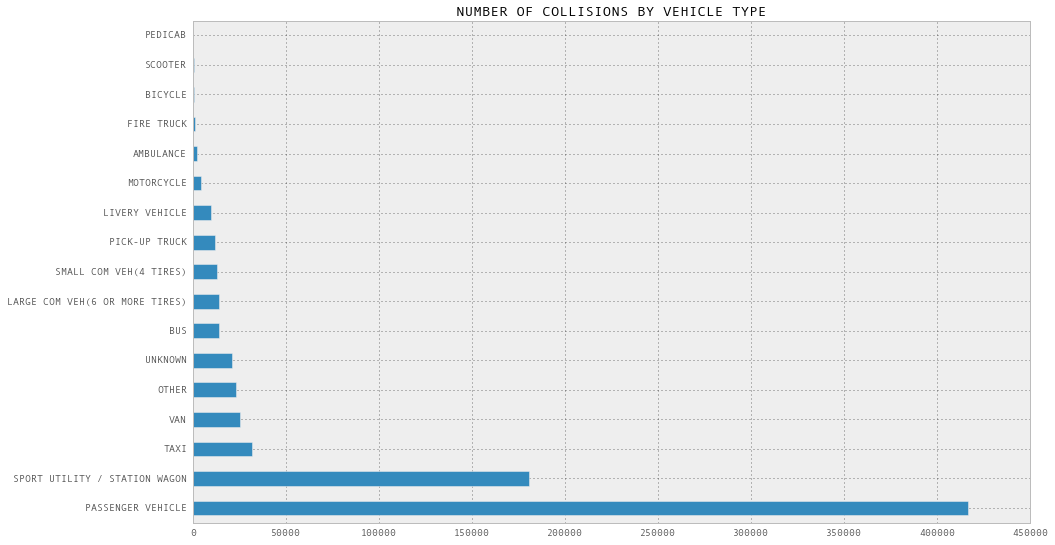

In [17]:
df_global["VEHICLE_TYPE_CODE1"].value_counts().plot(kind="barh", figsize = (15,9))
plt.title("NUMBER OF COLLISIONS BY VEHICLE TYPE")

plt.savefig("pngs/png1.png")

** _Passenger vehicle_ is by far the _most involved_ of all vehicle types in the collisions. **

In [18]:
vehicles1= df2.groupby("VEHICLE_TYPE_CODE1")["NO_OF_PERSONS_INJURED","NO_OF_PERSONS_KILLED"].sum()
vehicles1['KILLED_TO_INJURED_PERCENT'] = vehicles1.NO_OF_PERSONS_KILLED/vehicles1.NO_OF_PERSONS_INJURED * 100

vehicles1.sort_values(['KILLED_TO_INJURED_PERCENT'],ascending=False)

,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED,KILLED_TO_INJURED_PERCENT
VEHICLE_TYPE_CODE1,,,
MOTORCYCLE,2433,91,3.740238
LARGE COM VEH(6 OR MORE TIRES),1674,49,2.927121
BUS,3346,45,1.344889
SCOOTER,179,2,1.117318
UNKNOWN,7734,61,0.788725
FIRE TRUCK,135,1,0.740741
PICK-UP TRUCK,1956,14,0.715746
VAN,5331,37,0.694054
SMALL COM VEH(4 TIRES),1669,10,0.599161


** _Motorcycle_ collisions are most fatal. The collisions involving motorcycle has _highest_ number of _death to injured_ ratio.**

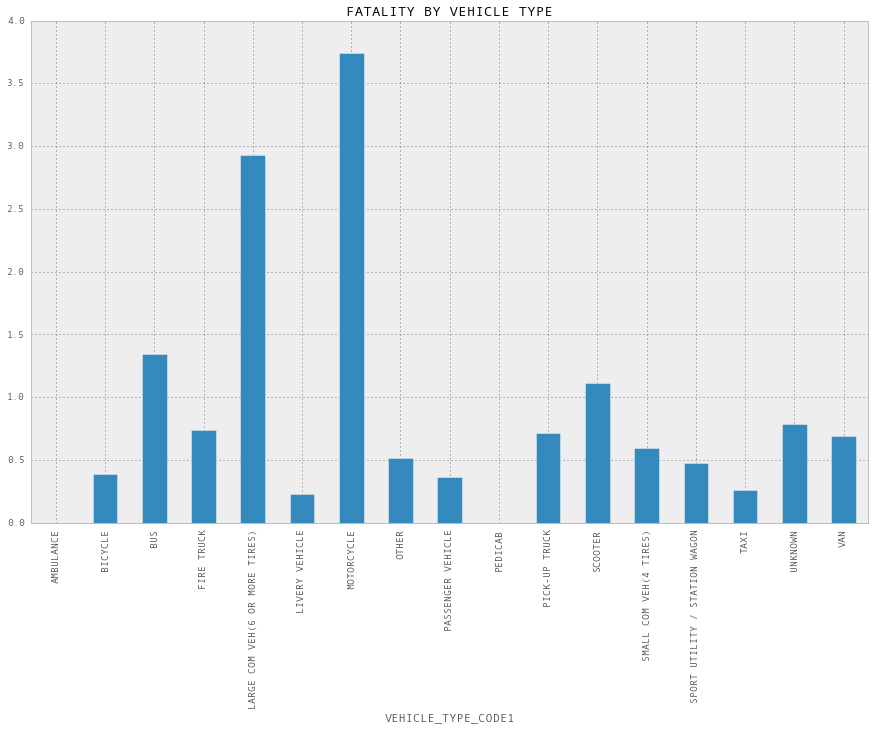

In [19]:
# plotting killed to injured percentage across vehicle types
vehicles1['KILLED_TO_INJURED_PERCENT'].plot(kind='bar', figsize = (15,9))
plt.title("FATALITY BY VEHICLE TYPE")

plt.savefig("pngs/png2.png")

The above plot is visual representation of fatality quotient (killed to injured ratio) across vehicle types. Motorcycle is by far the most vulnerable to fatal accidents of all vehicle types involved in collisions.

In [20]:
vehicles2= df2.groupby("VEHICLE_TYPE_CODE1")["INCIDENTS","NO_OF_PERSONS_KILLED"].sum()
vehicles2['FATALITY_RATE'] = vehicles2.NO_OF_PERSONS_KILLED/vehicles2.INCIDENTS * 100

vehicles2.sort_values(['FATALITY_RATE'],ascending=False)

,INCIDENTS,NO_OF_PERSONS_KILLED,FATALITY_RATE
VEHICLE_TYPE_CODE1,,,
MOTORCYCLE,4173,91,2.180685
SCOOTER,287,2,0.696864
LARGE COM VEH(6 OR MORE TIRES),13925,49,0.351885
BUS,13993,45,0.321589
BICYCLE,666,2,0.300300
UNKNOWN,20708,61,0.294572
VAN,25375,37,0.145813
FIRE TRUCK,763,1,0.131062
SPORT UTILITY / STATION WAGON,180740,219,0.121169


** Again, _Motorcycle_ collisions are most fatal. The collisions involving motorcycle have _highest_ rate of _death _ per _incident, with 2.2 fatalities every 100 incidents**

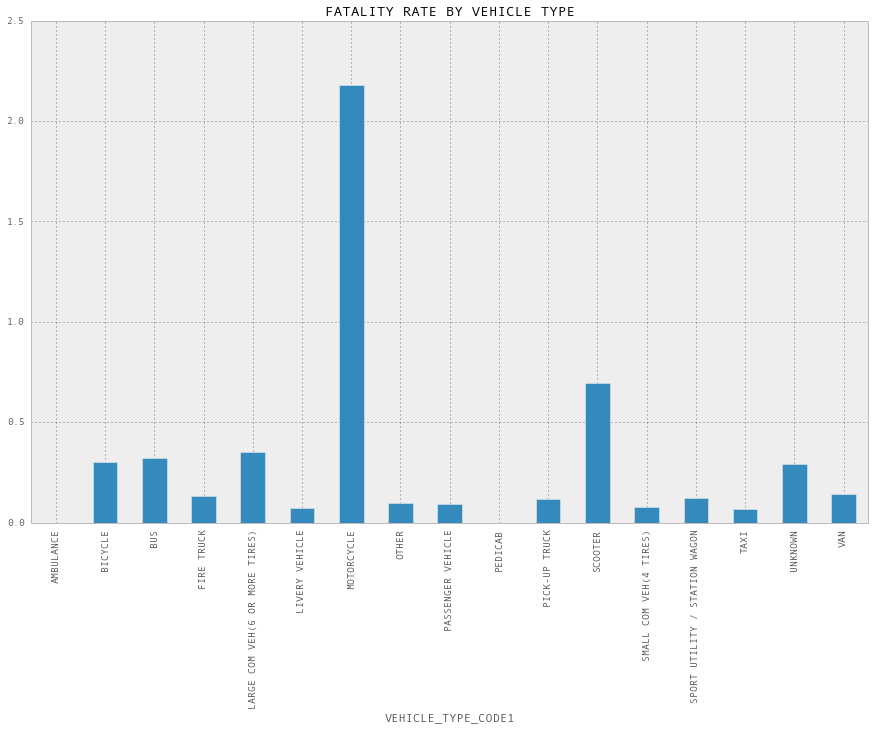

In [21]:
# plotting fatality rate across vehicle types
vehicles2['FATALITY_RATE'].plot(kind='bar', figsize = (15,9))
plt.title("FATALITY RATE BY VEHICLE TYPE")


plt.savefig("pngs/png3.png")

# Analysis of  Collisions by Locations

## Analysis by Boroughs

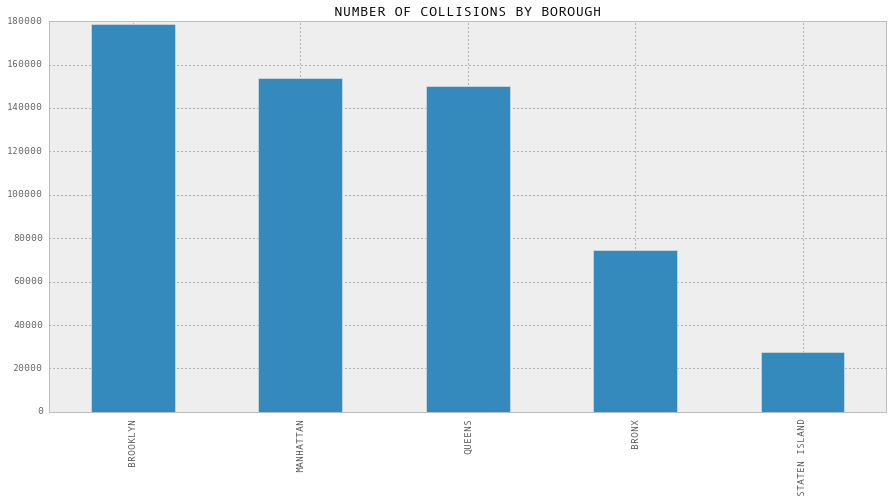

In [22]:
locations=df2[df2.BOROUGH.notnull()]
locations.BOROUGH.value_counts().plot(kind='bar', figsize = (15,7))
plt.title("NUMBER OF COLLISIONS BY BOROUGH")
plt.savefig("pngs/png4.png")

** Brooklyn has highest number of collisions among  boroughs , closely followed by Manhattan **

## Breakdown, by boroughs, of different groups killed in collisions 

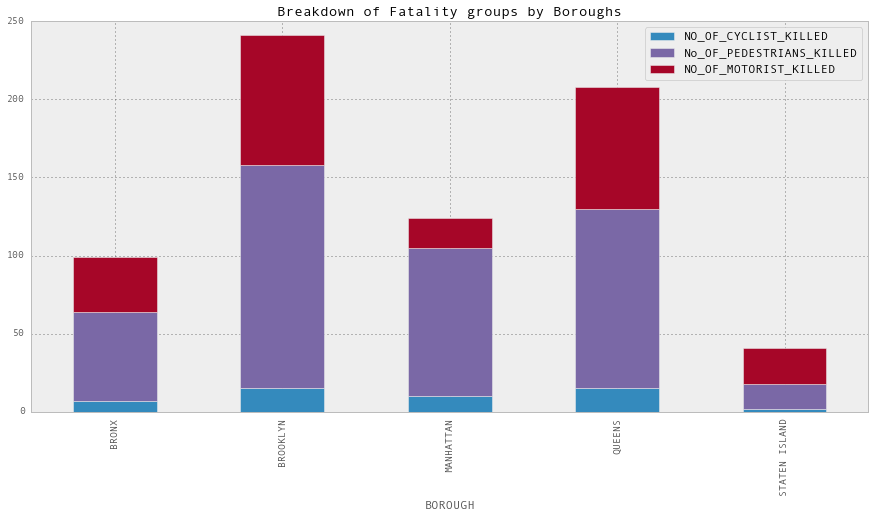

In [23]:
locations.groupby("BOROUGH")[["NO_OF_CYCLIST_KILLED","No_OF_PEDESTRIANS_KILLED",
                       "NO_OF_MOTORIST_KILLED"]].sum().plot(kind='bar',stacked='True', figsize = (15,7))
plt.title("Breakdown of Fatality groups by Boroughs")

plt.savefig("pngs/png5.png")

In [24]:
locations.groupby("BOROUGH")[["NO_OF_CYCLIST_KILLED","No_OF_PEDESTRIANS_KILLED",
                       "NO_OF_MOTORIST_KILLED"]].sum()

,NO_OF_CYCLIST_KILLED,No_OF_PEDESTRIANS_KILLED,NO_OF_MOTORIST_KILLED
BOROUGH,,,
BRONX,7,57,35
BROOKLYN,15,143,83
MANHATTAN,10,95,19
QUEENS,15,115,78
STATEN ISLAND,2,16,23


## Analysis of Collisions by Cross Streets

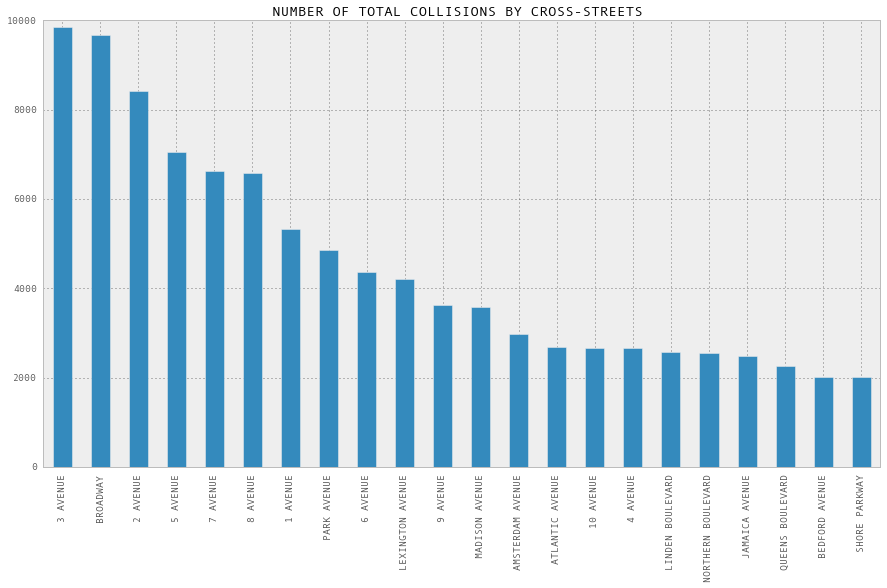

In [25]:
df2.CROSS_STREET_NAME.value_counts()[df2.CROSS_STREET_NAME.value_counts()>2000].plot(kind='bar', figsize = (15,8))
plt.title("NUMBER OF TOTAL COLLISIONS BY CROSS-STREETS ")

plt.savefig("pngs/png6.png")

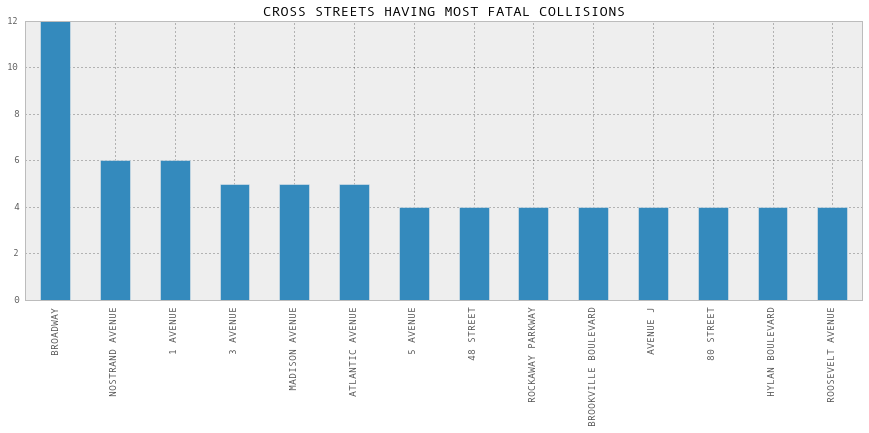

In [26]:
df2.CROSS_STREET_NAME[df2.NO_OF_PERSONS_KILLED >0 ].value_counts()[df2.CROSS_STREET_NAME[df2.NO_OF_PERSONS_KILLED >0].value_counts()>3].plot(kind='bar')
plt.title("CROSS STREETS HAVING MOST FATAL COLLISIONS")
plt.savefig("pngs/png7.png")

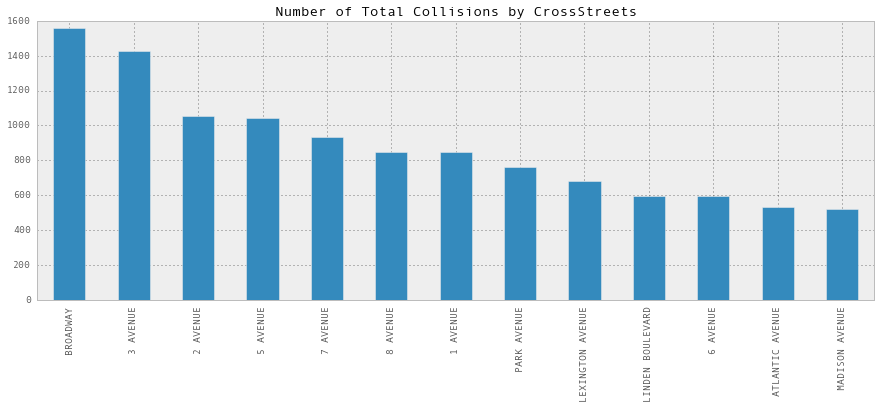

In [27]:
df2.CROSS_STREET_NAME[(df2.NO_OF_PERSONS_KILLED >0) | (df2.NO_OF_PERSONS_INJURED >0) ].value_counts()[df2.CROSS_STREET_NAME[(df2.NO_OF_PERSONS_KILLED >0) | (df2.NO_OF_PERSONS_INJURED >0) ].value_counts()>500].plot(kind='bar')
plt.title("Number of Total Collisions by CrossStreets")
plt.savefig("pngs/png8.png")

1) **'3 AVENUE'** cross-street has **most collisions** recorded followed by **'BROADWAY'**and **'2 AVENUE'**.
2) **BROADWAY** Cross-street has **most number of fatal** collisions. 
3) **BROADWAY** Cross-street has **highest"" number of total people injured or died in collisions.

In [28]:
df2.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'])[["INCIDENTS", "NO_OF_PERSONS_INJURED", "NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_INJURED", ascending=False).head(5)


,,INCIDENTS,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED
ON_STREET_NAME,CROSS_STREET_NAME,,,
ROCKAWAY BOULEVARD,BROOKVILLE BOULEVARD,334,177,2
164 STREET,GRAND CENTRAL PARKWAY,162,111,0
PENNSYLVANIA AVENUE,LINDEN BOULEVARD,247,93,0
FLATBUSH AVENUE,EMPIRE BOULEVARD,202,92,0
ATLANTIC AVENUE,LOGAN STREET,251,88,0


In [29]:
cross_incidents = df2.groupby(['LONGITUDE', 'LATITUDE'])[["INCIDENTS"]].sum().sort_values("INCIDENTS", ascending=False)

cross_incidents.head(7)

,,INCIDENTS
LONGITUDE,LATITUDE,
-73.984529,40.696035,585
-73.964314,40.760601,472
-73.989792,40.757232,455
-73.896853,40.675736,433
-73.890623,40.658578,417
-73.994040,40.720321,368
-73.870369,40.733497,354


In [73]:
import gmaps

gps = [[cross_incidents.index[x][1], cross_incidents.index[x][0]]  for x in range(40)]

gps
gmaps.heatmap(gps)



Very interesting finding: It seems ALL 42nd Street's crossings are at top ranking for most incidents

In [31]:
cross_kills = df2.groupby(['LONGITUDE', 'LATITUDE'])[["NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_KILLED", ascending=False)

cross_kills.head(3)

,,NO_OF_PERSONS_KILLED
LONGITUDE,LATITUDE,
-73.813334,40.697204,5
-73.900874,40.779280,4
-73.898830,40.642004,3


In [74]:
gps1 = [[cross_kills.index[x][1], cross_kills.index[x][0]]  for x in range(40)]

gps1
gmaps.heatmap(gps1)

In [33]:
df28 = df2.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'])[["INCIDENTS"]].sum().sort_values("INCIDENTS", ascending=False).head(10)

#df28["av_longitude"] = create_long(df28['ON_STREET_NAME'],df28['CROSS_STREET_NAME'])

df28

,,INCIDENTS
ON_STREET_NAME,CROSS_STREET_NAME,
WEST 42 STREET,8 AVENUE,396
FLATBUSH AVENUE,GRAND ARMY PLAZA,372
EAST 59 STREET,2 AVENUE,339
ROCKAWAY BOULEVARD,BROOKVILLE BOULEVARD,334
TILLARY STREET,FLATBUSH AVENUE EXTENSION,320
EAST 57 STREET,3 AVENUE,306
WEST 34 STREET,7 AVENUE,299
EAST 57 STREET,2 AVENUE,298
WEST 42 STREET,7 AVENUE,291


In [34]:
df2.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'])[["NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_KILLED", ascending=False).head(5)


,,NO_OF_PERSONS_KILLED
ON_STREET_NAME,CROSS_STREET_NAME,
94 AVENUE,VAN WYCK EXPRESSWAY,5
19 AVENUE,37 STREET,4
EAST 54 STREET,1 AVENUE,3
KENT AVENUE,WILSON STREET,3
AVENUE U,EAST 5 STREET,3



** WEST 42 STREET-8 AVENUE** Crossing has highest number of collision incidents.
** 94 AVENUE-VAN WYCK EXPRESSWAY** Crossing has highest number of fatality recorded.

## Analysis of Collisions by Zip Code

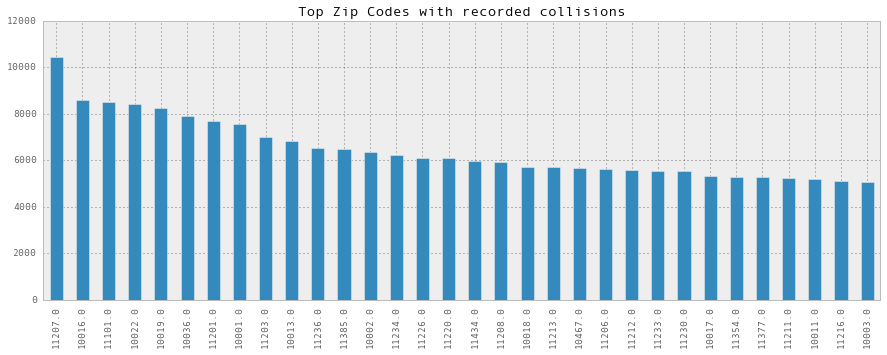

In [35]:

df2["ZIP_Code"].value_counts()[df2["ZIP_Code"].value_counts()>5000].plot(kind='bar')
plt.title("Top Zip Codes with recorded collisions")
plt.show()

plt.savefig("pngs/png9.png")

** Top 5 Zip Codes with highest occurence of Collision : 11207, 10016,11101,10022 and 10019. **

# Analysis of Contributing Factors for Collisions

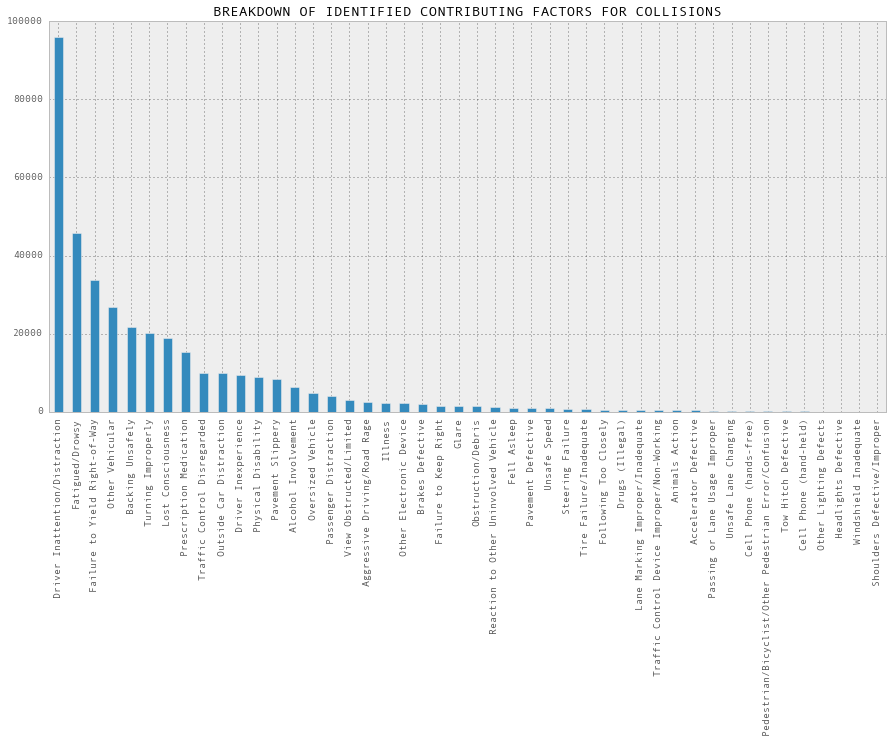

In [36]:
df2["CONTRIBUTING_FACTOR_1"][df2["CONTRIBUTING_FACTOR_1"] != 'Unspecified'] .value_counts().plot(kind='bar', figsize = (15,7))
plt.title("BREAKDOWN OF IDENTIFIED CONTRIBUTING FACTORS FOR COLLISIONS")
plt.show()
plt.savefig("pngs/png10.png")

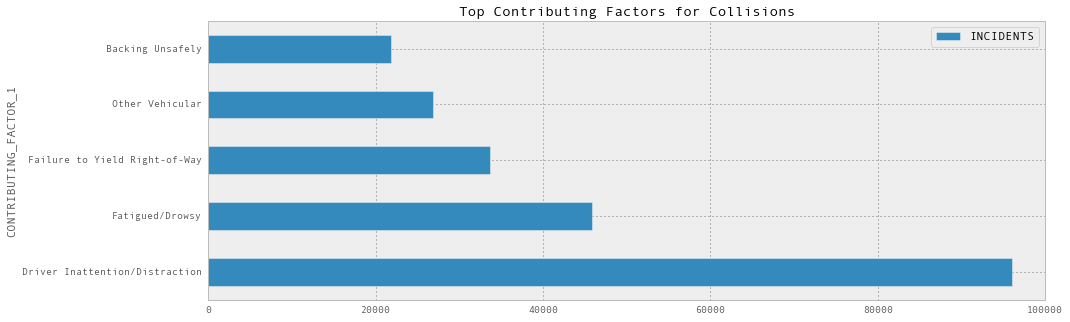

In [37]:
df2[df2['CONTRIBUTING_FACTOR_1'] != "Unspecified" ].groupby(['CONTRIBUTING_FACTOR_1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')

plt.title("Top Contributing Factors for Collisions")
plt.savefig("pngs/png33.png")

** Top 3 contributing factors for collisions are : 1. Driver Inattention/Distraction, 2. Fatigued/Drowsy and 3. Failure to Yield Right of Way.**

In [38]:
df2.groupby("CONTRIBUTING_FACTOR_1")[["NO_OF_PERSONS_INJURED", "NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_INJURED",ascending=False)

,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED
CONTRIBUTING_FACTOR_1,,
Unspecified,96777,444
Driver Inattention/Distraction,24329,93
Failure to Yield Right-of-Way,13342,74
Fatigued/Drowsy,11654,3
Traffic Control Disregarded,5727,140
Physical Disability,5476,28
Other Vehicular,4995,9
Prescription Medication,2981,7
Passenger Distraction,2869,48


# Analysis of Collisions by Times

In [39]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("NUMBER OF PERSONS INJURED", ascending=False).head()

,,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY OF WEEK,TIMEBRACKET,,,
Friday,Early Afternoon,48824,10827,44
Tuesday,Early Afternoon,46308,10355,32
Monday,Early Afternoon,44738,10319,35
Wednesday,Early Afternoon,45743,10307,43
Thursday,Early Afternoon,45355,10285,25


** Friday Early Afternoon ** has most number of collision incidents closely followed by Tuesday and Monday - All Early Afternoon.

In [40]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("NUMBER OF PERSONS INJURED", ascending=True).head()

,,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY OF WEEK,TIMEBRACKET,,,
Tuesday,Early Morning,6161,1848,22
Wednesday,Early Morning,6500,2088,29
Thursday,Early Morning,7188,2149,30
Monday,Early Morning,7283,2426,27
Friday,Early Morning,8929,2825,28


**Early Mornings** has lowest number of collision incidents.All Top 5 lowest recorded collision time brackets are in early morning. **Tuesday early morning"" in particular has lowest number of incidents across all time brackets for 5 years.

In [41]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS","NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum()


INCIDENTS  NUMBER OF PERSONS INJURED  \
DAY OF WEEK TIMEBRACKET                                             
Friday      Early Morning         8929                       2825   
            Morning              34083                       7539   
            Early Afternoon      48824                      10827   
            Evening              30883                       8730   
Monday      Early Morning         7283                       2426   
            Morning              34043                       7296   
            Early Afternoon      44738                      10319   
            Evening              24340                       7115   
Saturday    Early Morning        14874                       4996   
            Morning              20965                       4879   
            Early Afternoon      39006                       9697   
            Evening              27390                       8383   
Sunday      Early Morning        16272                       5739   
            Morning              16741                       4250   
            Early Afternoon      35724                       9148   
            Evening              22779                       7422   
Thursday    Early Morning         7188                       2149   
            Morning              33934                       7146   
            Early Afternoon      45355                      10285   
            Evening              27788                       7742   
Tuesday     Early Morning         6161                       1848   
            Morning              35758                       7711   
            Early Afternoon      46308                      10355   
            Evening              26459                       7633   
Wednesday   Early Morning         6500                       2088   
            Morning              33756                       7274   
            Early Afternoon      45743                      10307   
            Evening              27157                       7708   

                             NUMBER OF PERSONS KILLED  
DAY OF WEEK TIMEBRACKET                                
Friday      Early Morning                          28  
            Morning                                29  
            Early Afternoon                        44  
            Evening                                57  
Monday      Early Morning                          27  
            Morning                                38  
            Early Afternoon                        35  
            Evening                                50  
Saturday    Early Morning                          54  
            Morning                                17  
            Early Afternoon                        31  
            Evening                                33  
Sunday      Early Morning                          71  
            Morning                                16  
            Early Afternoon                        27  
            Evening                                37  
Thursday    Early Morning                          30  
            Morning                                28  
            Early Afternoon                        25  
            Evening                                45  
Tuesday     Early Morning                          22  
            Morning                                31  
            Early Afternoon                        32  
            Evening                                29  
Wednesday   Early Morning                          29  
            Morning                                23  
            Early Afternoon                        43  
            Evening                                49

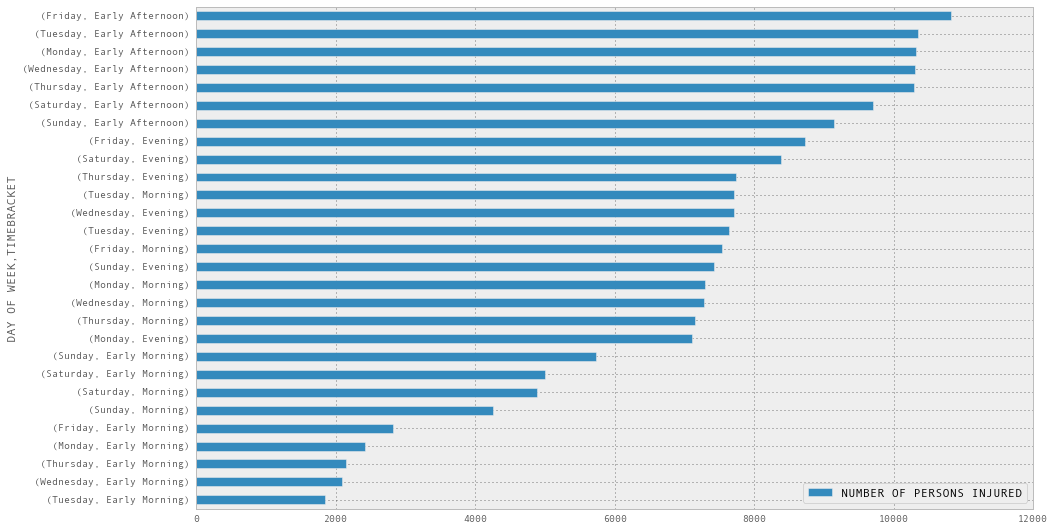

In [42]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[['NUMBER OF PERSONS INJURED']].sum().sort_values('NUMBER OF PERSONS INJURED', ascending= True).plot(kind='barh', figsize = (15,9))

plt.savefig("pngs/png11.png")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


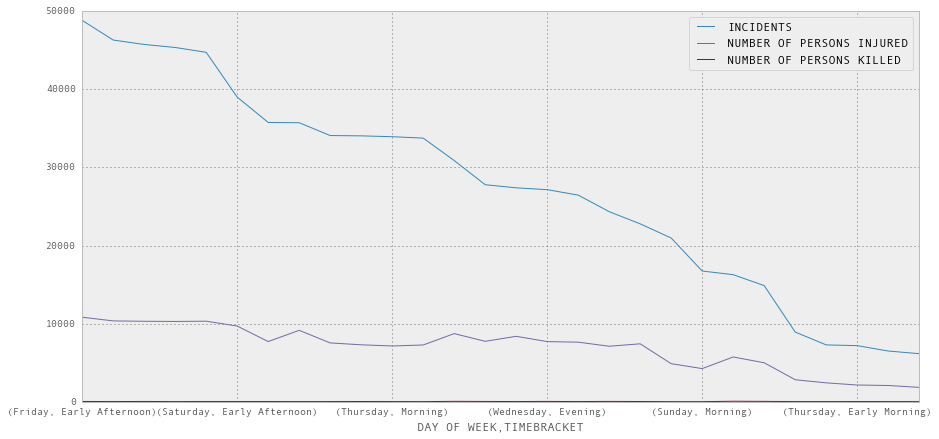

In [43]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort("INCIDENTS", ascending=False).plot(figsize = (15,7))

plt.savefig("pngs/png12.png")

# Analysis of Collision by Weather

** Finding: 90% of Top 10  ** days with ** most collision incidents ** were in **winter months** - November, December,January,February and March.

In [44]:
df_daily.sort_values("INCIDENTS", ascending=False).head(10)

,INCIDENTS,NO_OF_PERSONS_INJURED,WindAvg,VisAvg,Events,Precipi0.00a0.00ion,Rain,Fog,Snow
DATE,,,,,,,,,
2014-01-21,1161,168,NaN,NaN,[nan],0.00,False,False,False
2014-02-03,960,159,11.0,3.0,"[Fog, Rain, Snow]",29.72,True,True,True
2015-01-18,960,228,6.0,6.0,"[Fog, Rain]",53.34,True,True,False
2015-03-06,936,142,10.0,15.0,[nan],0.00,False,False,False
2013-11-26,867,243,7.0,11.0,[Rain],12.95,True,False,False
2013-03-08,851,180,12.0,7.0,"[Fog, Snow]",14.22,False,True,True
2015-03-05,829,90,9.0,3.0,"[Fog, Rain, Snow]",19.30,True,True,True
2015-11-20,819,203,9.0,16.0,[nan],0.00,False,False,False
2015-05-29,812,216,7.0,16.0,[nan],0.00,False,False,False


** Finding: Approximately 30%  ** of New York days are **rainy !!** 

In [45]:
rainy_days = int(df_daily.Rain[df_daily.Rain == True].value_counts())
foggy_days = int(df_daily.Fog[df_daily.Fog == True].value_counts())
snowy_days = int(df_daily.Snow[df_daily.Snow == True].value_counts())

print("No. of Rainy Days = ", rainy_days, "   Percentage Total Days:", rainy_days / len(df_daily))
print("No. of Snowy Days = ", snowy_days, "   Percentage Total Days:", snowy_days / len(df_daily))
print("No. of Rainy Days = ", foggy_days, "   Percentage Total Days:", foggy_days / len(df_daily))

No. of Rainy Days =  400    Percentage Total Days: 0.29563932002956395
No. of Snowy Days =  91    Percentage Total Days: 0.0672579453067258
No. of Rainy Days =  104    Percentage Total Days: 0.07686622320768663


** Finding: October** has **highest** number of collision incidents while **April** has **lowest**.

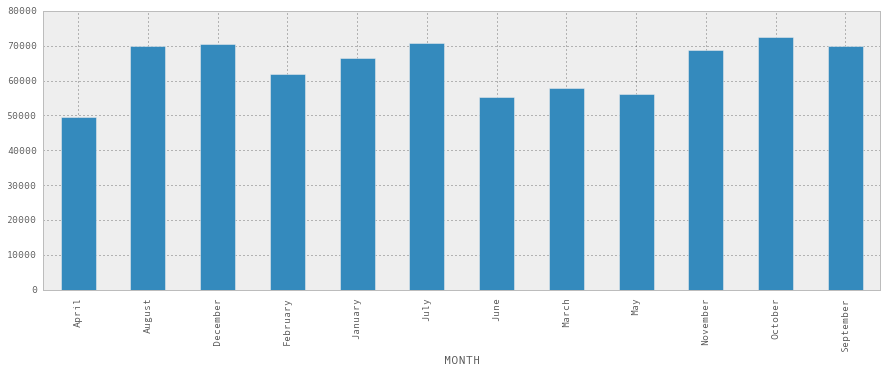

In [46]:
df.groupby('MONTH')['INCIDENTS'].sum().plot(kind='bar')

plt.savefig("pngs/png13.png")

In [47]:
df.groupby('MONTH')['INCIDENTS'].sum()

MONTH
April        49576
August       69947
December     70492
February     61741
January      66334
July         70756
June         55397
March        57865
May          56013
November     68646
October      72488
September    69799
Name: INCIDENTS, dtype: int64

** Finding:** It seems that weather conditions **do not affect** incident numbers

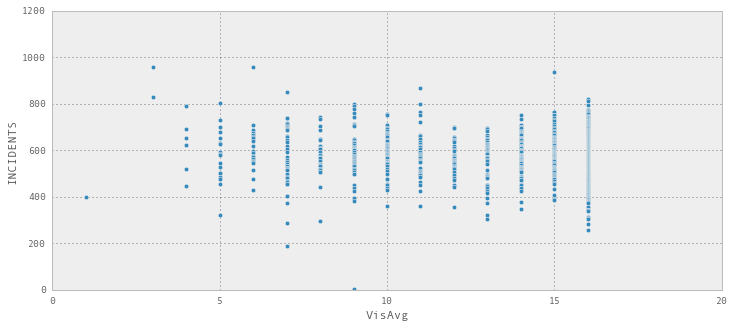

In [48]:
# Is there any correlation between Wind speed and No. of Accidents?
# Answer is: No

df_daily.plot(x='VisAvg', y='INCIDENTS', kind='scatter', figsize = (12,5))
plt.xlim((0, 20))
plt.ylim((0, 1200))

plt.savefig("pngs/png14.png")

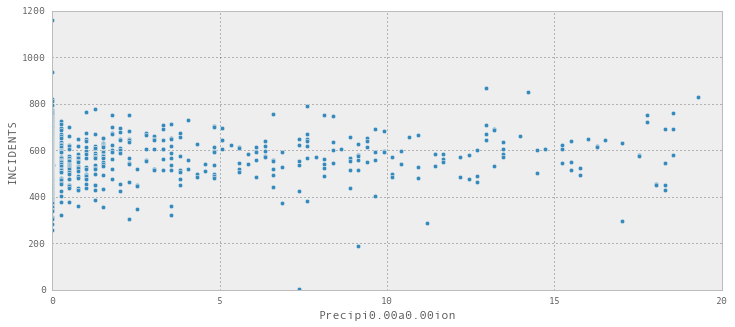

In [49]:
df_daily.plot(x='Precipi0.00a0.00ion', y='INCIDENTS', kind='scatter', figsize = (12,5))
plt.xlim((0, 20))
plt.ylim((0, 1200))

plt.savefig("pngs/png14.png")

There is **no** obvious correleation between number of collisions recorded and **average wind speed during the day**. However, average wind average may be misleading as the actual wind speed during the collision is unknown.

Also, no correlation with the **rain percipitation** during the day

# Section 2: Diving into specific questions

# What are the most contributing factors in different times of the day?

## Driver inattention rules

However, unlike other parts of the day, Alcohol Involvement is the second highest contributor for accidents during the night

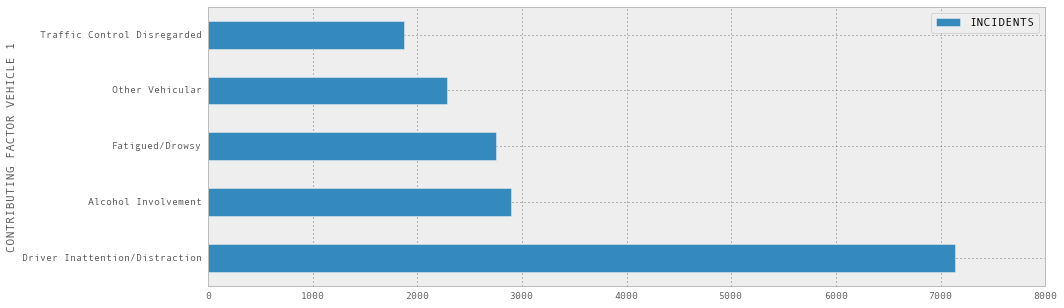

In [50]:
df[(df['TIMEBRACKET'] == "Early Morning") & (df['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified") ].groupby(['CONTRIBUTING FACTOR VEHICLE 1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')


# When do most ALcohol related incidents happen? Obvious Answer!

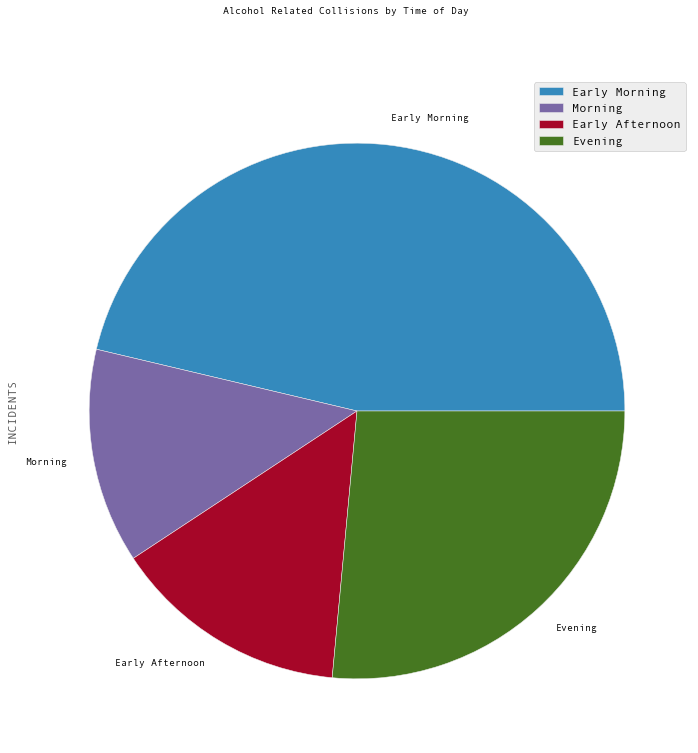

In [51]:
df[df['CONTRIBUTING FACTOR VEHICLE 1'] == "Alcohol Involvement"] .groupby(['TIMEBRACKET'])[['INCIDENTS']].sum().plot.pie(figsize=(12, 12),subplots=True, title = "Alcohol Related Collisions by Time of Day")

plt.savefig("pngs/png28.png")


In [52]:
df.index

RangeIndex(start=0, stop=769054, step=1)

# Do accidents causes change with time of day? Yes they do!


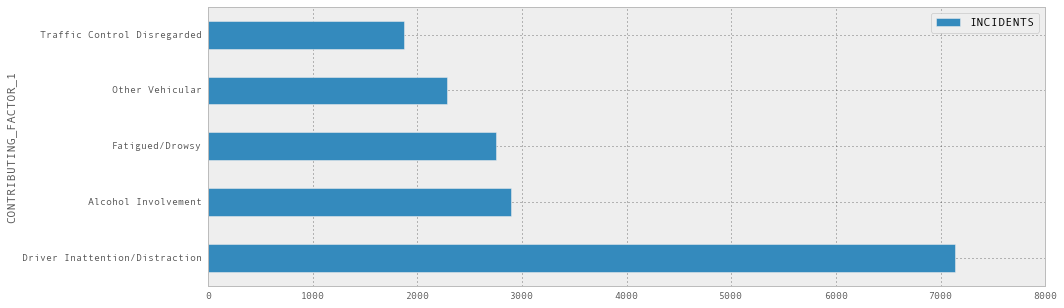

In [53]:
df2[(df2['TIMEBRACKET'] == "Early Morning") & (df2['CONTRIBUTING_FACTOR_1'] != "Unspecified") ].groupby(['CONTRIBUTING_FACTOR_1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')

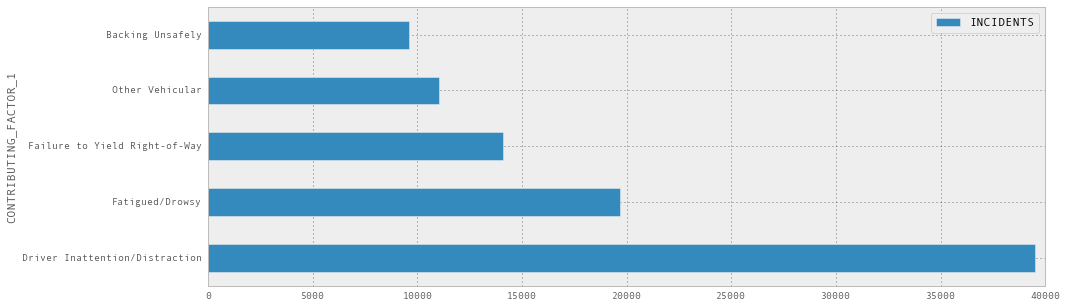

In [54]:
df2[(df2['TIMEBRACKET'] == "Early Afternoon") & (df2['CONTRIBUTING_FACTOR_1'] != "Unspecified") ].groupby(['CONTRIBUTING_FACTOR_1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')

## When do Accidents happen most?


In [55]:
part_of_day = df.groupby(['TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("INCIDENTS", ascending=False)
part_of_day

,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
TIMEBRACKET,,,
Early Afternoon,305698,70938,237
Morning,209280,46095,182
Evening,186796,54733,300
Early Morning,67207,22071,261


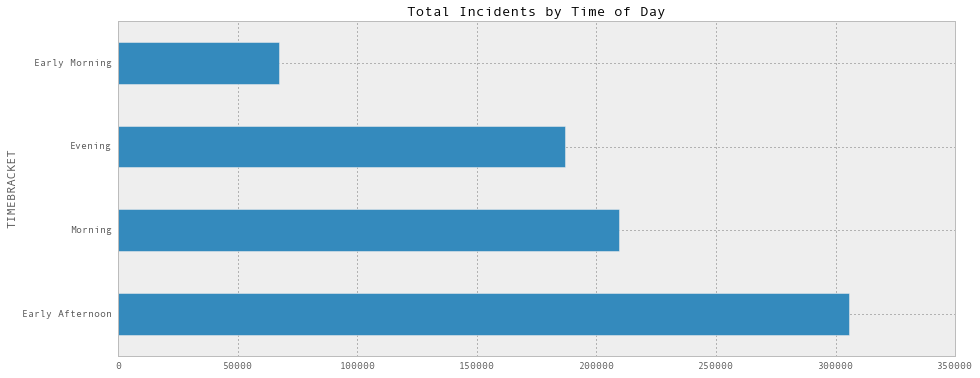

In [56]:
part_of_day['INCIDENTS'].plot(kind="barh", figsize = (15,6))
plt.title("Total Incidents by Time of Day")
plt.savefig("pngs/png15.png")

## In what part of the day are accidents more fatal?

In [57]:
part_of_day['Fatality Ratio'] = part_of_day['NUMBER OF PERSONS KILLED']/ part_of_day['INCIDENTS'] * 100
part_of_day

,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,Fatality Ratio
TIMEBRACKET,,,,
Early Afternoon,305698,70938,237,0.077527
Morning,209280,46095,182,0.086965
Evening,186796,54733,300,0.160603
Early Morning,67207,22071,261,0.388352


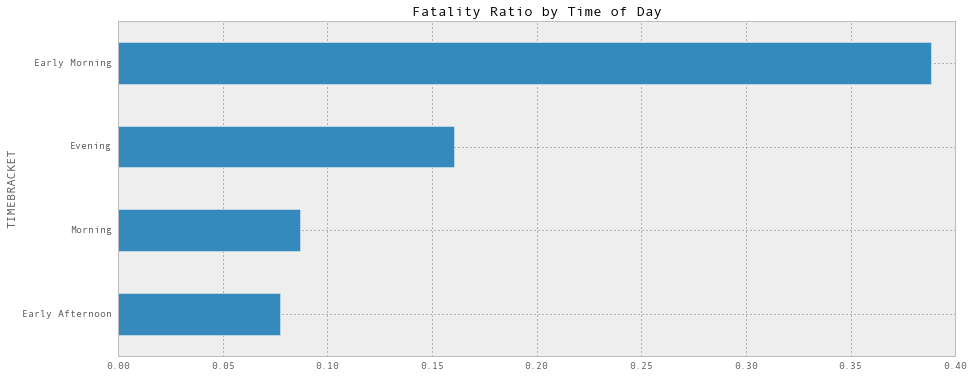

In [58]:
part_of_day['Fatality Ratio'].plot(kind="barh", figsize = (15,6))
plt.title("Fatality Ratio by Time of Day")
plt.savefig("pngs/png16.png")

## Important Conclusion:
#### Early Afternoon most incidents (of course because of more traffic) but least deadly
#### Early Morning least incidents but most deadly

## Do Accident Causes change when it rains? You bet!

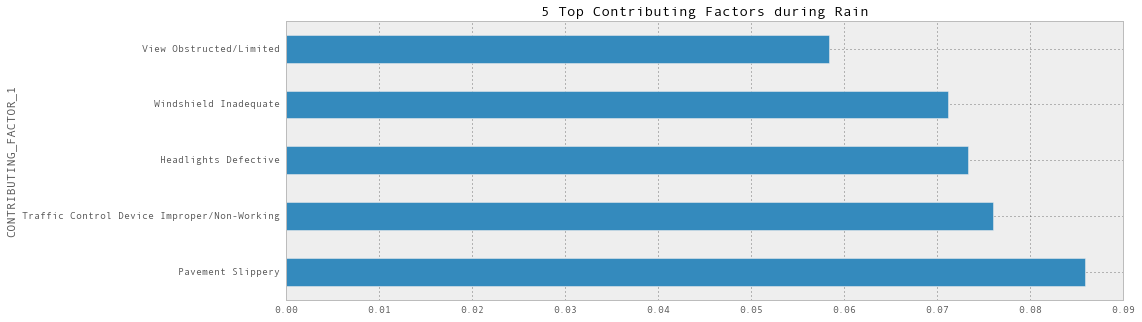

In [59]:
weather_causes = df_global.groupby("CONTRIBUTING_FACTOR_1")["INCIDENTS","Rain", "Snow"].sum()
weather_causes["rain_ratio"]= weather_causes["Rain"]/ weather_causes["INCIDENTS"]* 100
weather_causes["snow_ratio"]= weather_causes["Snow"]/ weather_causes["INCIDENTS"]*100
weather_causes.sort_values("snow_ratio", ascending=False)

weather_causes.rain_ratio.sort_values(ascending=False).head(5).plot(kind="barh")
plt.title("5 Top Contributing Factors during Rain")
plt.savefig("pngs/png31.png")


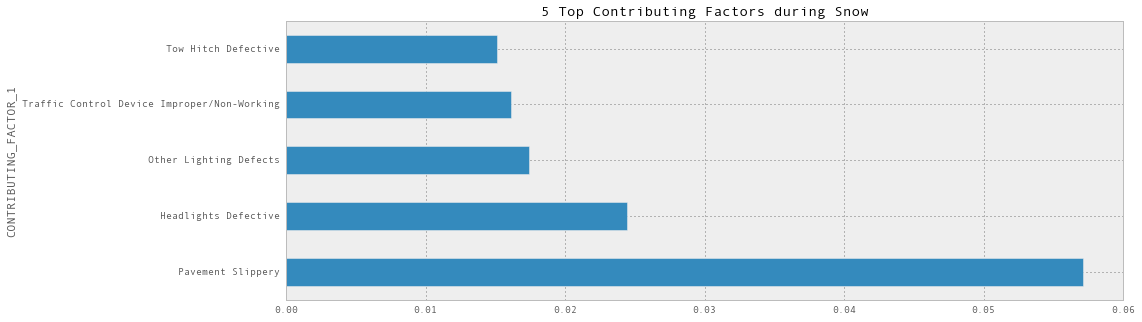

In [60]:
weather_causes.snow_ratio.sort_values(ascending=False).head(5).plot(kind="barh")
plt.title("5 Top Contributing Factors during Snow")
plt.savefig("pngs/png32.png")

## What are the most common causes by Borough?

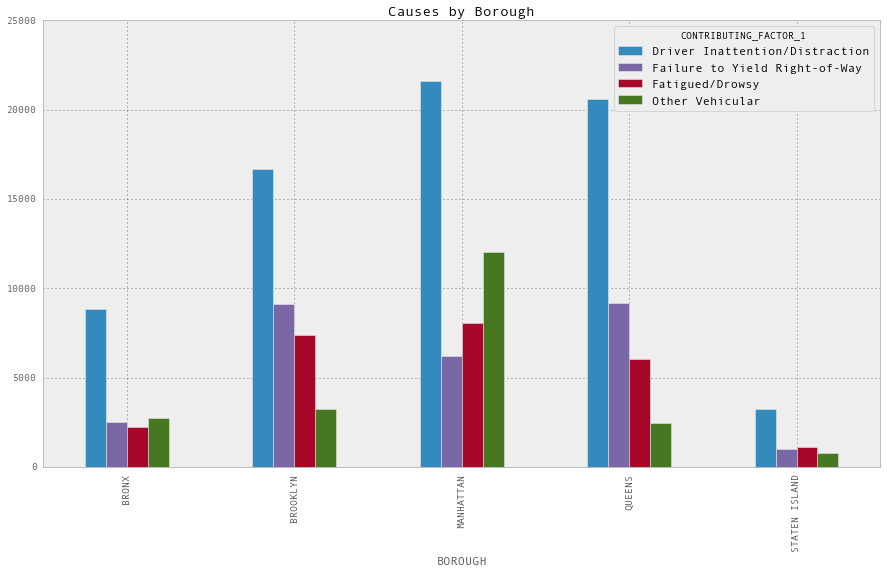

In [61]:
most_causes = [df2["CONTRIBUTING_FACTOR_1"].value_counts()[0:6].index[x] for x in range(1,6)]

borough_temp = df2[(df2["CONTRIBUTING_FACTOR_1"] == most_causes[0]) |\
    (df2["CONTRIBUTING_FACTOR_1"] == most_causes[1]) |\
    (df2["CONTRIBUTING_FACTOR_1"] == most_causes[2]) |\
    (df2["CONTRIBUTING_FACTOR_1"] == most_causes[3]) ]

borough_causes = borough_temp.groupby('BOROUGH')['CONTRIBUTING_FACTOR_1'].value_counts().sort_values(ascending=False)
borough_causes_un = borough_causes.unstack("CONTRIBUTING_FACTOR_1")
borough_causes_un.plot(kind="bar", figsize= (15,8), title = "Causes by Borough")
plt.savefig("pngs/png199.png")

## Which boroughs are in bad need of Roads Maintenance?

In [62]:
slippery = df2[df2["CONTRIBUTING_FACTOR_1"] == 'Pavement Slippery']
slippery.groupby("BOROUGH")['INCIDENTS'].sum()

BOROUGH
BRONX             905
BROOKLYN         1630
MANHATTAN         900
QUEENS           1781
STATEN ISLAND     461
Name: INCIDENTS, dtype: int64

## In which Borough is cycling a Bad Idea?

In [63]:
cycling = df2.groupby("BOROUGH")[["NO_OF_CYCLIST_INJURED", "INCIDENTS"]].sum().sort_values("NO_OF_CYCLIST_INJURED", ascending=False)
cycling["cyclist_collision_ratio"] = cycling["NO_OF_CYCLIST_INJURED"] / cycling["INCIDENTS"] * 100
cycling['per_cycl'] = ["{0:.2f}%".format(val) for val in cycling['cyclist_collision_ratio']]
cycling.drop("cyclist_collision_ratio",axis=1, inplace=True)
cycling

,NO_OF_CYCLIST_INJURED,INCIDENTS,per_cycl
BOROUGH,,,
BROOKLYN,5520,178741,3.09%
MANHATTAN,4159,153824,2.70%
QUEENS,2671,150226,1.78%
BRONX,1201,74465,1.61%
STATEN ISLAND,135,27497,0.49%


## Pie Charts

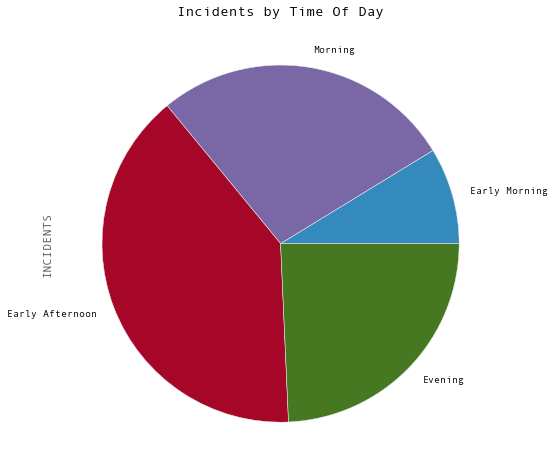

In [64]:
df2.groupby("TIMEBRACKET")["INCIDENTS"].sum().plot.pie(figsize=(8, 8), title = "Incidents by Time Of Day")
plt.savefig("pngs/png18.png")


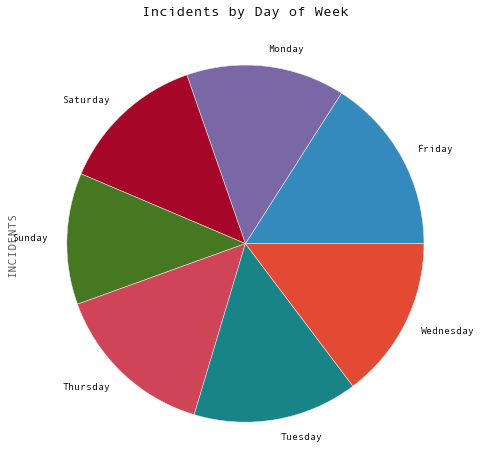

In [65]:
df2.groupby("DAY_OF_WEEK")["INCIDENTS"].sum().plot.pie(figsize=(8, 8), title = "Incidents by Day of Week")
plt.savefig("pngs/png19.png")

## The highest days in incidents all happen during winter

In [66]:
df2.groupby("DATE")["INCIDENTS"].sum().sort_values(ascending=False).head(5)

DATE
2014-01-21    1161
2015-01-18     960
2014-02-03     960
2015-03-06     936
2013-11-26     867
Name: INCIDENTS, dtype: int64

## What about special holidays? How's their average compared to a normal day?

It turns out that, On Christmas Day and Thanksgiving day, the average incidents are much les than the average incidents in a normal day

In contracts, on the days before these holidays, and as people go out for shopping etc, the average is much higher than a normal day

Haloween day is different, it has a higher average than the normal average, I assume this is because people do go out on that nifgt

In [67]:
average_per_day = len(df2) / len(weather)

christmas = df_temp2["2012-12-25"].append(df_temp2["2013-12-25"]).append(df_temp2["2014-12-25"]).append(df_temp2["2015-12-25"])
thanksgiving = df_temp2["2012-11-22"].append(df_temp2["2013-11-28"]).append(df_temp2["2014-11-27"]).append(df_temp2["2015-11-26"])
before_christmas = df_temp2["2012-12-23"].append(df_temp2["2013-12-23"]).append(df_temp2["2014-12-23"]).append(df_temp2["2015-12-23"])
before_thanksgiving = df_temp2["2012-11-21"].append(df_temp2["2013-11-27"]).append(df_temp2["2014-11-26"]).append(df_temp2["2015-11-25"])
halooween = df_temp2["2012-10-31"].append(df_temp2["2013-10-31"]).append(df_temp2["2014-10-31"]).append(df_temp2["2015-10-31"])


holidays = pd.DataFrame([len(christmas)/4,len(thanksgiving)/4,len(before_christmas)/4,len(before_thanksgiving)/4,len(halooween)/4],
          index=[ "Christmas", "Thanksgiving", "Day Before Christmas", "Day Before Thanksgiving", "Haloowen"])

holidays["variance"] = ((holidays[0] / average_per_day) - 1)
holidays['percvariance'] = ["{0:.2f}%".format(val * 100) for val in holidays['variance']]

holidays




,0,variance,percvariance
Christmas,308.75,-0.383748,-38.37%
Thanksgiving,393.50,-0.214590,-21.46%
Day Before Christmas,662.75,0.322822,32.28%
Day Before Thanksgiving,722.50,0.442080,44.21%
Haloowen,547.25,0.092288,9.23%


In [68]:
average_per_day

501.01237785016286

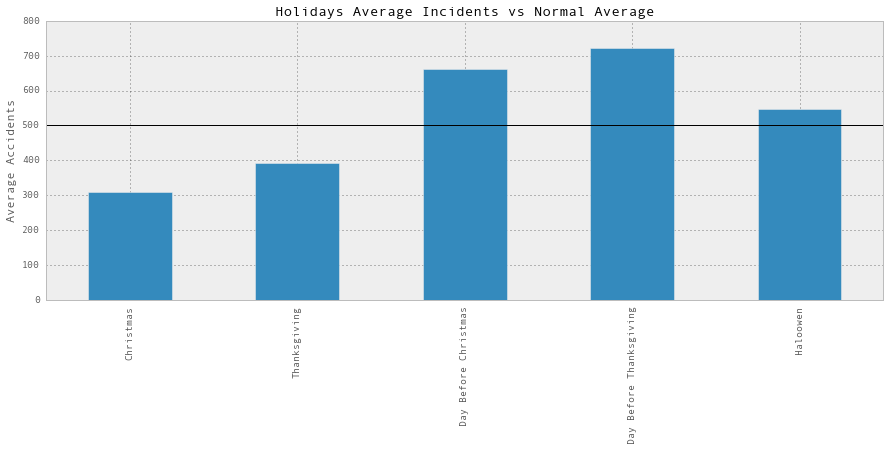

In [69]:
holidays[0].plot(kind="bar", title = "Holidays Average Incidents vs Normal Average"); plt.axhline(average_per_day, color='k')

plt.ylabel("Average Accidents")

plt.savefig("pngs/png20.png")

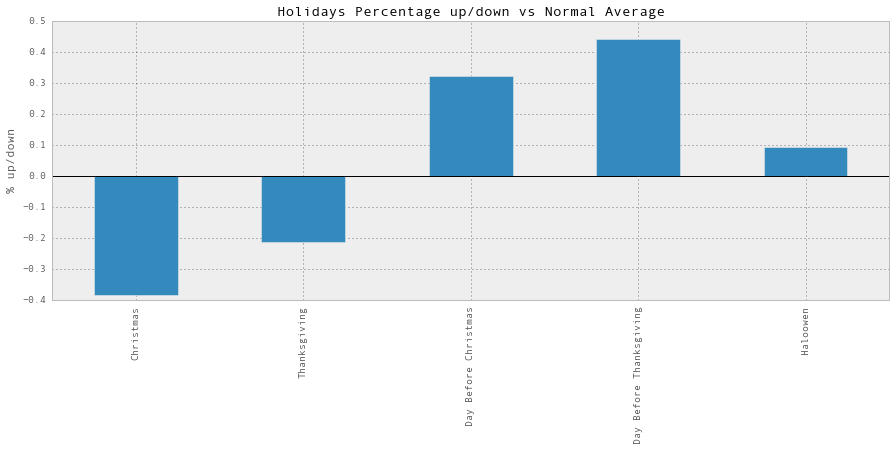

In [70]:

holidays["variance"].plot(kind= "bar", title = "Holidays Percentage up/down vs Normal Average"); plt.axhline(0, color='k')

plt.ylabel("% up/down")

plt.savefig("pngs/png21.png")

## When and Where did the deadliest incidents happen?

In [71]:
df333 = df_global[["BOROUGH","DAY_OF_WEEK" , "MONTH", "NO_OF_PERSONS_KILLED"]]
df333.sort_values("NO_OF_PERSONS_KILLED", ascending=False).head(10)

,BOROUGH,DAY_OF_WEEK,MONTH,NO_OF_PERSONS_KILLED
DATE,,,,
2012-07-22,QUEENS,Sunday,July,5
2014-04-04,QUEENS,Friday,April,4
2013-01-05,BROOKLYN,Saturday,January,3
2013-03-03,BROOKLYN,Sunday,March,3
2015-07-01,QUEENS,Wednesday,July,3
2013-11-11,QUEENS,Monday,November,2
2012-12-16,BROOKLYN,Sunday,December,2
2015-04-05,NaN,Sunday,April,2
2013-04-01,NaN,Monday,April,2


## And the deadliest of all? Where, When and what's the cause?

In [72]:
df2.ix[757242][['NO_OF_PERSONS_KILLED', 'NO_OF_MOTORIST_KILLED', 'DATE', 'TIME', 'DAY_OF_WEEK', 'TIMEBRACKET', 'BOROUGH', 
               'ON_STREET_NAME', 'CROSS_STREET_NAME', 
               'CONTRIBUTING_FACTOR_1']]


NO_OF_PERSONS_KILLED                           0
NO_OF_MOTORIST_KILLED                          0
DATE                         2012-07-22 00:00:00
TIME                                       17:50
DAY_OF_WEEK                               Sunday
TIMEBRACKET                      Early Afternoon
BOROUGH                                 BROOKLYN
ON_STREET_NAME                      ADAMS STREET
CROSS_STREET_NAME                 TILLARY STREET
CONTRIBUTING_FACTOR_1    Prescription Medication
Name: 757242, dtype: object